# Retrieving and exploring data on BART ridership

In [95]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import seaborn as sns
#import ipywidgets
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# import custom scripts
import pitt_line_stations

## Get the BART rider data 
Dowload the CSV and store it as a pd dataframe

In [48]:
# looks like 2017 data are incomplete. Let's use 2016
#url = 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2017.csv.gz'
url = 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2016.csv.gz'
df = pd.read_csv(url, header=None)

In [49]:
df.head(10)

,0,1,2,3,4
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
5,2016-01-01,0,12TH,BAYF,2
6,2016-01-01,0,12TH,CIVC,7
7,2016-01-01,0,12TH,CONC,2
8,2016-01-01,0,12TH,DBRK,6
9,2016-01-01,0,12TH,DELN,2


### Clean up trip data and make a couple of new features

#### Rename the columns and filter for relevant trips

In [70]:
# rename columns to something informative
df.rename(columns={0: 'date', 1: 'hour', 2: 'orig', 3: 'dest', 4: 'trips_per_hr'},
         inplace=True)

In [71]:
df.head()

,date,hour,orig,dest,trips_per_hr
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


For now, let's just look at trips originating from stations on the PITT line. Might want to filter down even further.

In [72]:
# filter data to only include trips orginating at desired stations
df_pitt = df.loc[df['orig'].isin(pitt_line_stations.stations), :]

In [73]:
# lets make sure we're only working with data from the desired stations
df_pitt['orig'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'BALB', 'CIVC', 'COLM', 'DALY',
       'EMBR', 'GLEN', 'LAFY', 'MCAR', 'MLBR', 'MONT', 'NCON', 'ORIN',
       'PHIL', 'PITT', 'POWL', 'ROCK', 'SBRN', 'SFIA', 'SSAN', 'WCRK',
       'WOAK'], dtype=object)

#### Generate some temporal features from the date

In [74]:
# transform the dates to pd datetime objects
df_pitt['date'] = pd.to_datetime(df_pitt['date'])

In [75]:
# generate weekday and month features
df_pitt['day'] = df_pitt['date'].dt.weekday_name
df_pitt['month'] = df_pitt['date'].dt.month

In [76]:
df_pitt.head(10)

,date,hour,orig,dest,trips_per_hr,day,month
0,2016-01-01,0,12TH,12TH,1,Friday,1
1,2016-01-01,0,12TH,16TH,1,Friday,1
2,2016-01-01,0,12TH,24TH,4,Friday,1
3,2016-01-01,0,12TH,ASHB,4,Friday,1
4,2016-01-01,0,12TH,BALB,2,Friday,1
5,2016-01-01,0,12TH,BAYF,2,Friday,1
6,2016-01-01,0,12TH,CIVC,7,Friday,1
7,2016-01-01,0,12TH,CONC,2,Friday,1
8,2016-01-01,0,12TH,DBRK,6,Friday,1
9,2016-01-01,0,12TH,DELN,2,Friday,1


### Check out some basic visualizations
Let's narrow down to just one station for these rough plots so we're not plotting so much data.

In [78]:
# filter for the Mcarthur station
df_mcar = df_pitt.loc[df_pitt['orig']=='MCAR', :]

In [121]:
df_mcar['trips_per_hr'].sum()

2778770

In [117]:
# sum by orig station by hour, day, month
mcar_sum = df_mcar.groupby(by=['orig', 'day', 'hour']).sum()['trips_per_hr']
mcar_sum.fillna(value=0, inplace=True)

In [118]:
mcar_sum.head(30)

orig  day     hour
MCAR  Friday  0        2425
              1         525
              2          86
              3          46
              4         673
              5        4407
              6       13453
              7       36015
              8       66494
              9       54544
              10      28817
              11      19580
              12      18238
              13      17435
              14      17129
              15      21886
              16      32206
              17      43262
              18      38040
              19      22395
              20      12505
              21       9957
              22       8098
              23       6256
      Monday  0        1502
              1         344
              3           1
              4         603
              5        4124
              6       13689
Name: trips_per_hr, dtype: int64

In [115]:
mcar_sum.head(30)

hour                0      1     2     3      4       5        6        7   \
orig day                                                                     
MCAR Friday     2425.0  525.0  86.0  46.0  673.0  4407.0  13453.0  36015.0   
     Monday     1502.0  344.0   0.0   1.0  603.0  4124.0  13689.0  36227.0   
     Saturday   4008.0  963.0   0.0   0.0    0.0     5.0   2502.0   5237.0   
     Sunday     3477.0  925.0   0.0   0.0    0.0     0.0     45.0    238.0   
     Thursday   2212.0  430.0   0.0   1.0  721.0  4801.0  15217.0  41145.0   
     Tuesday    1934.0  409.0   0.0   0.0  794.0  4825.0  15819.0  43627.0   
     Wednesday  2201.0  479.0   1.0   0.0  850.0  5042.0  15597.0  42513.0   

hour                 8        9    ...         14       15       16       17  \
orig day                           ...                                         
MCAR Friday     66494.0  54544.0   ...    17129.0  21886.0  32206.0  43262.0   
     Monday     68651.0  56588.0   ...    13821.0  18267.0  27946.0  40979.0   
     Saturday    9163.0  13878.0   ...    16921.0  15703.0  15149.0  16289.0   
     Sunday      5676.0   9401.0   ...    13650.0  12316.0  11423.0  10732.0   
     Thursday   74496.0  61340.0   ...    15194.0  20389.0  31817.0  45541.0   
     Tuesday    78406.0  62627.0   ...    14574.0  19989.0  31420.0  45354.0   
     Wednesday  77229.0  61986.0   ...    15785.0  20663.0  31662.0  46479.0   

hour                 18       19       20      21      22      23  
orig day                                                           
MCAR Friday     38040.0  22395.0  12505.0  9957.0  8098.0  6256.0  
     Monday     36791.0  16698.0   8793.0  7526.0  5927.0  3654.0  
     Saturday   15458.0  13999.0   9932.0  8659.0  7699.0  5674.0  
     Sunday      9805.0   8586.0   6801.0  5994.0  5126.0  3285.0  
     Thursday   41569.0  21169.0  10737.0  9294.0  7494.0  4580.0  
     Tuesday    41618.0  19944.0  10235.0  8295.0  6596.0  3999.0  
     Wednesday  41538.0  19911.0  10378.0  9003.0  6781.0  4056.0  

[7 rows x 24 columns]

Text(0.5,1,'Trips taken from McArthur station')

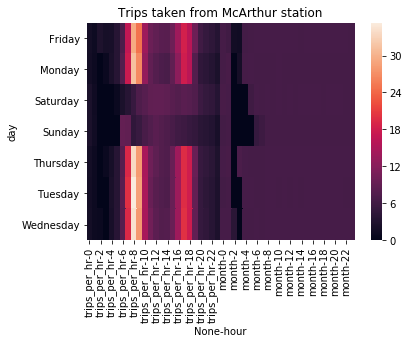

In [116]:
sns.heatmap(day_hour_count)
plt.title('Trips taken from McArthur station')

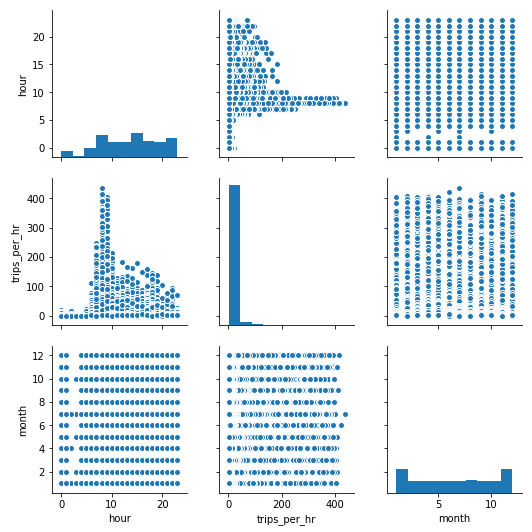

In [80]:
sns.pairplot(df_mcar)

In [ ]:
# group trip sums by day and hour


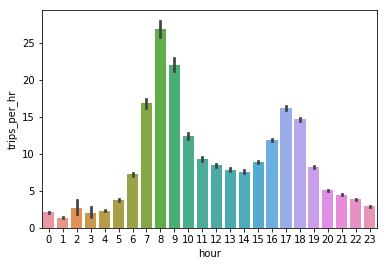

Do some pivots to get a glimpse of temporal trends

In [119]:
day_hour_count = df_mcar.groupby(by=['day', 'hour']).sum()['trips_per_hr'].unstack()
day_hour_count.fillna(value=0, inplace=True)
#day_hour_count.head()

In [120]:
day_hour_count.head(10)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,2425.0,525.0,86.0,46.0,673.0,4407.0,13453.0,36015.0,66494.0,54544.0,...,17129.0,21886.0,32206.0,43262.0,38040.0,22395.0,12505.0,9957.0,8098.0,6256.0
Monday,1502.0,344.0,0.0,1.0,603.0,4124.0,13689.0,36227.0,68651.0,56588.0,...,13821.0,18267.0,27946.0,40979.0,36791.0,16698.0,8793.0,7526.0,5927.0,3654.0
Saturday,4008.0,963.0,0.0,0.0,0.0,5.0,2502.0,5237.0,9163.0,13878.0,...,16921.0,15703.0,15149.0,16289.0,15458.0,13999.0,9932.0,8659.0,7699.0,5674.0
Sunday,3477.0,925.0,0.0,0.0,0.0,0.0,45.0,238.0,5676.0,9401.0,...,13650.0,12316.0,11423.0,10732.0,9805.0,8586.0,6801.0,5994.0,5126.0,3285.0
Thursday,2212.0,430.0,0.0,1.0,721.0,4801.0,15217.0,41145.0,74496.0,61340.0,...,15194.0,20389.0,31817.0,45541.0,41569.0,21169.0,10737.0,9294.0,7494.0,4580.0
Tuesday,1934.0,409.0,0.0,0.0,794.0,4825.0,15819.0,43627.0,78406.0,62627.0,...,14574.0,19989.0,31420.0,45354.0,41618.0,19944.0,10235.0,8295.0,6596.0,3999.0
Wednesday,2201.0,479.0,1.0,0.0,850.0,5042.0,15597.0,42513.0,77229.0,61986.0,...,15785.0,20663.0,31662.0,46479.0,41538.0,19911.0,10378.0,9003.0,6781.0,4056.0


Text(0.5,1,'Trips taken from MacArthur station')

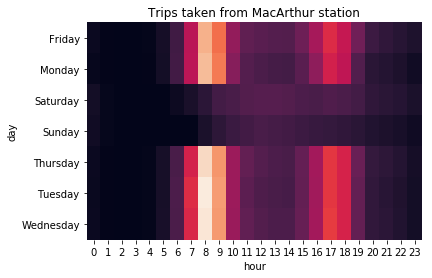

In [123]:
# plot heat map of the days and hours with most rides
sns.heatmap(day_hour_count, cbar=False)
plt.title('Trips taken from MacArthur station')